In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("data/Example Flow Rates.csv")
df

,sw,qo,qw
0,0.00,0.0600,0.000
1,0.20,0.0420,0.000
2,0.30,0.0300,0.010
3,0.40,0.0200,0.020
4,0.50,0.0130,0.035
5,0.60,0.0075,0.051
6,0.70,0.0040,0.068
7,0.80,0.0010,0.085
8,0.85,0.0000,0.096
9,1.00,0.0000,0.250


In [7]:
def calculate_relative_permeabilities(flowrate: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate relative permeabilities for oil and water.

    Parameters:
    flowrate (pd.DataFrame): DataFrame containing 'qo' (oil flowrate), 'qw' (water flowrate), and 'Sw' (water saturation).

    Returns:
    pd.DataFrame: DataFrame with additional columns for 'kr_o' and 'kr_w' (relative permeabilities).
    """
    flowrate['kr_o'] = flowrate['qo'] / flowrate['qo'].iloc[0]  # Relative permeability of oil
    flowrate['kr_w'] = flowrate['qw'] / flowrate['qw'].iloc[-1] # Relative permeability of water
    return flowrate

def plot_relative_permeabilities(flowrate: pd.DataFrame) -> None:
    """
    Plot the relative permeabilities of oil and water.

    Parameters:
    flowrate (pd.DataFrame): DataFrame containing 'Sw', 'kr_o', and 'kr_w'.
    """
    plt.style.use('seaborn-whitegrid')
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5), dpi=100)

    # Plot the flowrate of Oil and Water
    ax1.plot(flowrate['sw'], flowrate['qo'], label=r'Flowrates of oil ($q_o$)', linewidth=2, color="blue")
    ax1.plot(flowrate['sw'], flowrate['qw'], label=r'Flowrates of water ($q_w$)', linewidth=2, color='green')
    ax1.set_xlabel(r'$S_W$ (Water Saturation)', fontsize=14)
    ax1.set_ylabel(r'$q_o, q_w (cm^3/s) $')
    
    ax1.grid(True, which='both', linestyle='--', linewidth=0.6)
    ax1.legend(fontsize=12, loc='best')
    ax1.set_title("Flowrates of Oil and Water", fontsize=16)

    # Plot the relative permeabilities
    ax2.plot(flowrate['sw'], flowrate['kr_o'], label=r'Relative Permeabilities of Oil ($k_{r_o})$', linewidth=2, color='blue')
    ax2.plot(flowrate['sw'], flowrate['kr_w'], label=r'Relative Permeabilities of Water ($k_{r_w})$', linewidth=2, color='green')
    ax2.set_xlabel(r'$S_w$ (Water Saturation)', fontsize=14)
    ax2.set_ylabel(r'$k_{r_o}, k_{r_w}$', fontsize=14)

    ax2.grid(True, which='both', linestyle='--', linewidth=0.6)
    ax2.legend(fontsize=12, loc='best')
    ax2.set_title("Relative Permeabilities of Oil and Water", fontsize=16)

    fig.tight_layout()

    plt.show()

C:\Users\pandu\AppData\Local\Temp\ipykernel_17468\4275597402.py:22: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


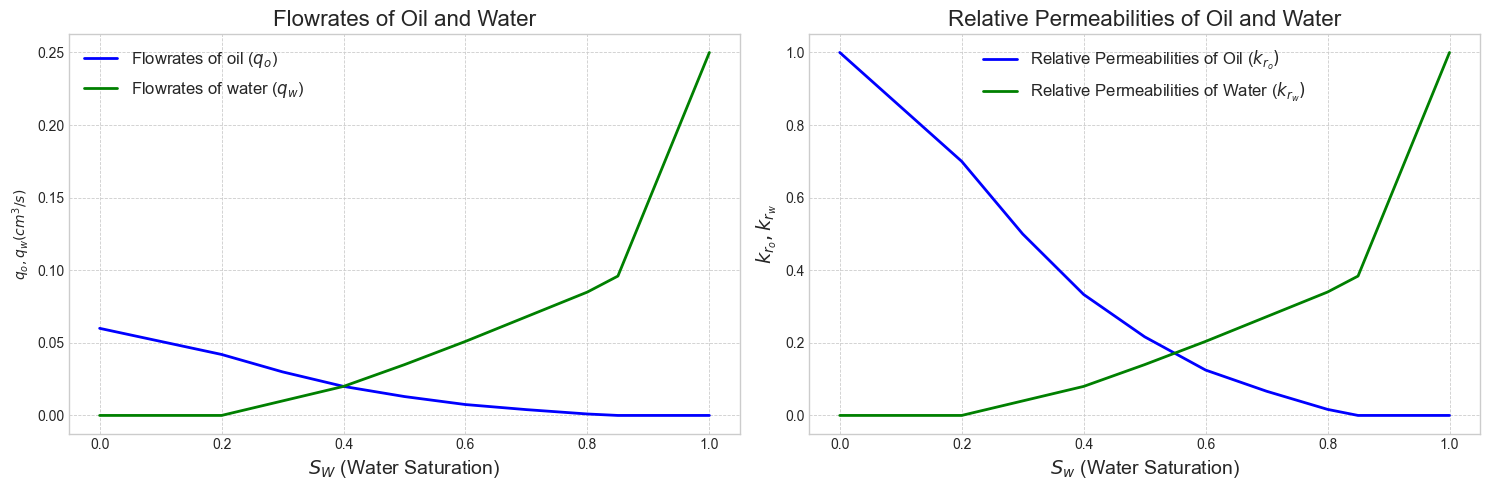

In [8]:
flowrate = calculate_relative_permeabilities(df)
plotting = plot_relative_permeabilities(flowrate)